In [1]:
import requests
from PIL import Image

In [8]:
class Serial(object):
    contents = []
    def __init__(self):
        self.base_url = 'https://media.st.dl.pinyuncloud.com/steam/apps/1033450/ss_%s.600x338.jpg'
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36'}
        self.pic_list = ['131fd8ee1ef30ad2f1e5f2c7f1cfea3e9429307d',
                         '108458739ddda898456c1a48a3b346854e392e45',
                         'b57b65b533487c2259649c59ea4be44ad35bc8cd',
                         'a03ff4bd0439bdc5d5f0bbb5907b4f22fd09797e',
                         '080ab52c3e008211ce33724fb8a2de6c6987f70a',
                         '2247a9a3310de3db442bd5e37614d3fe185ffe01']
        self.param = {'t': '1559288448'}
        self.pic: Image.Image

    def run(self):
        for i in self.pic_list:
            print(i)
            response = requests.get(url=self.base_url % i, headers=self.headers, params=self.param)
            self.contents.append(response.content)

In [9]:
s = Serial()

In [10]:
s.run()

131fd8ee1ef30ad2f1e5f2c7f1cfea3e9429307d
108458739ddda898456c1a48a3b346854e392e45
b57b65b533487c2259649c59ea4be44ad35bc8cd
a03ff4bd0439bdc5d5f0bbb5907b4f22fd09797e
080ab52c3e008211ce33724fb8a2de6c6987f70a
2247a9a3310de3db442bd5e37614d3fe185ffe01


In [11]:
import IPython.display as display

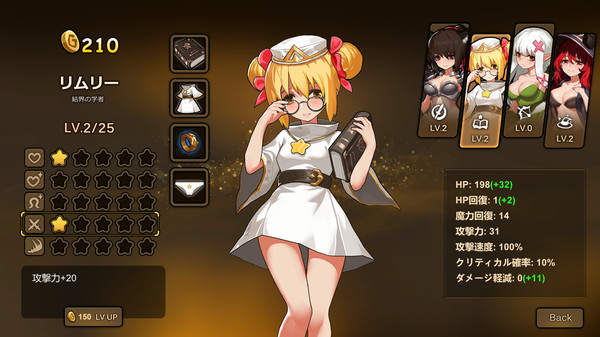

In [14]:
display.Image(s.contents[2])

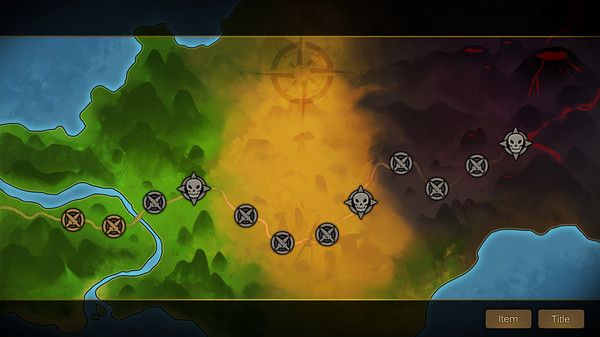

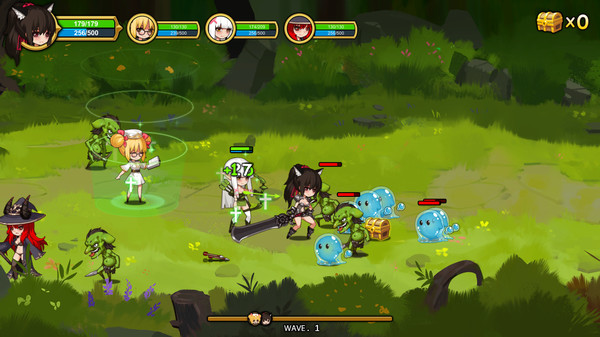

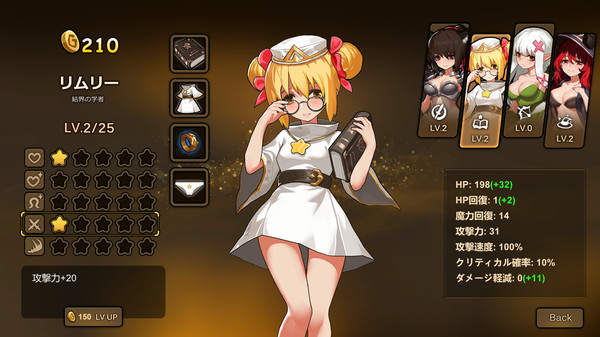

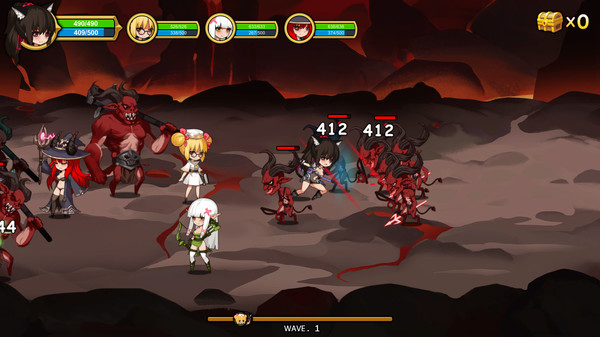

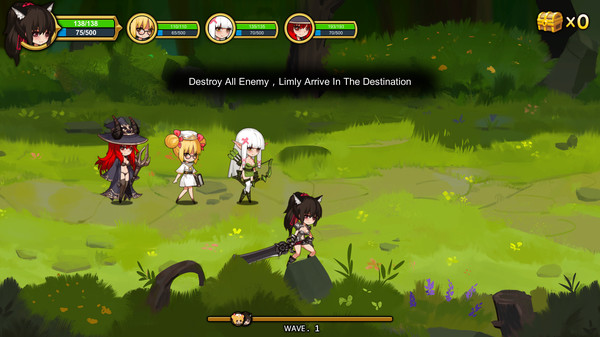

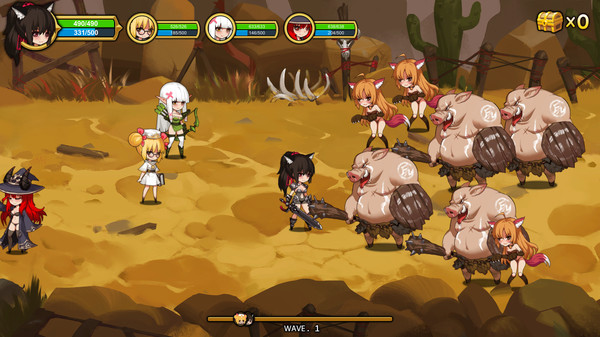

In [17]:
for c in s.contents:
    display.display(display.Image(c))

In [22]:
import numpy as np

In [29]:
conc_base = np.array(s.contents[0])

In [53]:
import io

In [54]:
io.BytesIO(s.contents[0])

In [55]:
b = Image.open(io.BytesIO(s.contents[0]))

In [57]:
b.show()

In [58]:
np.array(b)

array([[[3, 4, 6],
        [3, 4, 6],
        [3, 4, 6],
        ...,
        [2, 0, 1],
        [2, 0, 1],
        [2, 0, 1]],

       [[3, 4, 6],
        [3, 4, 6],
        [3, 4, 6],
        ...,
        [2, 0, 1],
        [2, 0, 1],
        [2, 0, 1]],

       [[3, 4, 6],
        [3, 4, 6],
        [3, 4, 6],
        ...,
        [2, 0, 1],
        [2, 0, 1],
        [2, 0, 1]],

       ...,

       [[2, 3, 5],
        [2, 3, 5],
        [2, 3, 5],
        ...,
        [1, 3, 2],
        [0, 2, 1],
        [0, 2, 1]],

       [[1, 2, 4],
        [2, 3, 5],
        [2, 3, 5],
        ...,
        [0, 2, 1],
        [0, 2, 1],
        [0, 2, 1]],

       [[2, 3, 5],
        [2, 3, 5],
        [2, 3, 5],
        ...,
        [1, 3, 2],
        [1, 3, 2],
        [1, 3, 2]]], dtype=uint8)

In [52]:
b = Image.frombytes(mode='RGB',size=[600,337],data=s.contents[0])

ValueError: not enough image data

In [44]:
b = np.array(s.contents[1])

In [47]:
np.array(b).reshape([600,337])

ValueError: cannot reshape array of size 1 into shape (600,337)

In [36]:
c = np.concatenate((conc_base, b), axis=0)

ValueError: zero-dimensional arrays cannot be concatenated

In [30]:
for c in s.contents:
    im = np.array(c)
    conc_base = np.concatenate((conc_base, im), axis=0)

ValueError: zero-dimensional arrays cannot be concatenated

In [ ]:
display.Image(conc_base)

In [ ]:
Image.fromarray(y).save('./y.jpg')